<a href="https://colab.research.google.com/github/RabeenaRasulla/CodSoft-Task/blob/main/TASK3_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK-3 : IRIS FLOWER CLASSIFICATION**
   
Author: Rabeena R

Batch : December (A95)

Domain : Data Science

Aim : To develop a model that can classify iris flowers into diffreent species based on their sepal and petal measuremnts.



IMPORTING IMPORTANT LIBRARIES

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


DOWNLOADING DATASETS

In [21]:
df =sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'],categories =pd.factorize(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


Hence its time to visualize the data

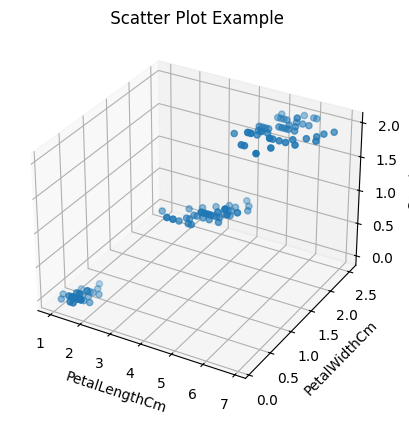

In [11]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()

ax=fig.add_subplot(111, projection='3d')

ax.scatter(df.petal_length, df.petal_width, df.species)

ax.set_xlabel('PetalLengthCm')

ax.set_ylabel('PetalWidthCm')

ax.set_zlabel('Species')

plt.title(' Scatter Plot Example')

plt.show()

<Axes: xlabel='petal_length', ylabel='sepal_width'>

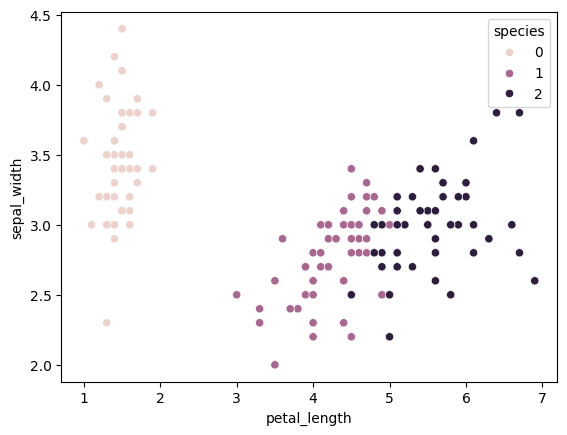

In [12]:
sns.scatterplot(data=df,x='petal_length',y='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

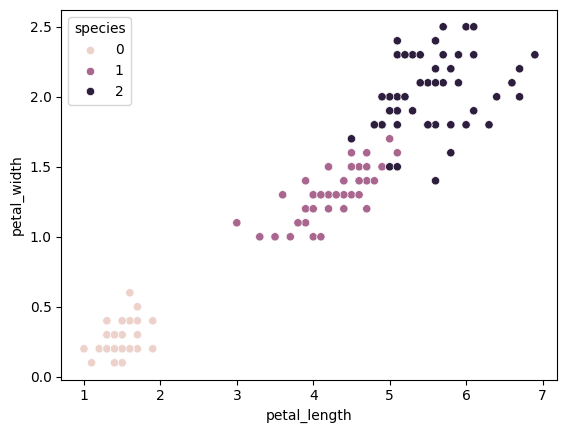

In [14]:
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')

Appling Elbow Technique

In [27]:
k_rng =range(1,10)
sse=[]
for k in k_rng:
  km= KMeans (n_clusters=k)
  km.fit(df[['petal_length','petal_width']])
  sse.append(km.inertia_)


In [28]:
sse

[550.8953333333333,
 86.39021984551391,
 31.371358974358966,
 20.299607803485397,
 14.067949656750573,
 11.08722366260479,
 9.50097867242849,
 8.356154188948308,
 6.646704739704738]

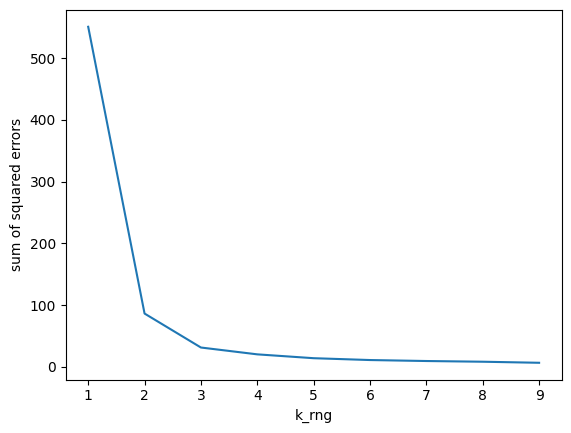

In [29]:
plt.xlabel('k_rng')
plt.ylabel("sum of squared errors")
plt.plot(k_rng,sse)


In [30]:
km=KMeans(n_clusters=3,random_state=0)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [32]:
df['cluster']=y_predicted
df.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


Accuracy measure

In [41]:
# Convert 'species' column to numerical representation if it contains strings
if df['species'].dtype == object:  # Check if the column is of object type (string)
    df['species'], _ = pd.factorize(df['species'])  # Convert to numerical using factorize

# Convert 'cluster' column to numerical type
df['cluster'] = pd.to_numeric(df['cluster'])

# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['species'], df['cluster'])
cm

array([[ 0, 50,  0],
       [48,  0,  2],
       [ 4,  0, 46]])

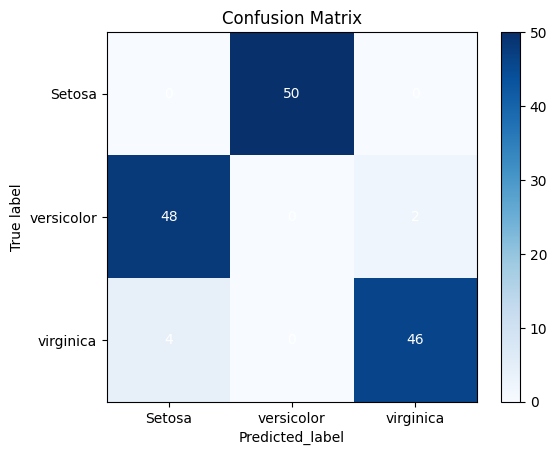

In [44]:
true_labels = df.species
predicted_labels = df.cluster

cm = confusion_matrix(true_labels, predicted_labels)  # Corrected variable name: true_labels
class_labels = ['Setosa', 'versicolor', 'virginica']

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

plt.title('Confusion Matrix')

plt.colorbar()

tick_marks = np.arange(len(class_labels))

plt.xticks(tick_marks, class_labels)

plt.yticks(tick_marks, class_labels)

# Fill matrix with values

for i in range(len(class_labels)):
    for j in range(len(class_labels)):  # Indented this line
        plt.text(j, i, str(cm[i][j]), ha='center', va='center', color="white")  # Indented this line

plt.xlabel('Predicted_label')

plt.ylabel('True label')

plt.show()

In [45]:
[16]

[16]